In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# impostazione per vedere tutte le colonne di un DataFrame
pd.set_option('display.max_columns',None)

# 1. CAPIRE BENE IL PROBLEMA

### 1.1 IMPORT DEI DATI

I dati sono nella cartella in formato .csv. Normalmente il dataset NON è già diviso in train set e test set, come invece in questo caso viene fornito da Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

NB! All'inizio di ogni analisi di ML la prima cosa da fare è separare una parte del dataset da tenere come 'test set' finale, sul quale non verrà fatta alcuna operazione di training. Questo è necessario per testare le capacità previsionali del modello su un set 'sconosciuto' al modello stesso, in modo anche da rivelare eventuali problemi di overfitting.

In [ ]:
# facciamo le nostre analisi sul training set
train_df = pd.read_csv('housing.csv') 
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [ ]:
# prime 5 righe del DataFrame
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_df['SalePrice'] #ci sono 1459 record(case) e quello di fianco è il prezzo delle case

In [ ]:
# info sulla composizione del DataFrame
train_df.info()

Nel dataset si notano tre tipi di dati: 'int64', 'float64' e 'object'. Tipicamente gli 'object' sono variabili categoriche, mentre 'int' e 'float' sono variabili numeriche.

### 1.2 VALUTAZIONE SOGGETTIVA: COSA MI ASPETTO?

Le valutazioni 'a occhio' sono uno step fondamentale per ogni analisi di Machine Learning. Servono a prendere confidenza con i dati e fare una prima individuazione di quelle che potrebbero essere le variabili più importanti per il nostro attuale problema. 

La descrizione del significato di ogni colonna del dataset (fornita da Kaggle) è nel file data_description.txt. Ho creato però un file excel di supporto (housing_qualitative.xlsx), per impostare una prima valutazione soggettiva e qualitativa della variabili in gioco.

Aprite il file excel e provate a ipotizzare quali variabili potrebbero essere le più influenti sulla determinazione del prezzo di una casa. Per ogni variabile inserite nella colonna 'IMPORTANZA' un voto scelto da voi tra 'bassa', 'media', 'alta'.

Domande che potreste farvi sono per esempio:
- tengo in considerazione questa variabile quando devo comprare (o affittare) un casa?
- l'informazione contenuta in questa variabile è già contenuta in altre?
- ...

# 2. ESPLORAZIONE DELLE VARIABILI PRINCIPALI

### 2.1 ESPLORAZIONE DELLA VARIABILE TARGET

La prima cosa da esplorare è certamente la cosiddetta variabile 'target' della nostra previsione. In questo caso vogliamo prevedere il prezzo di una casa sulla base di altri dati contestuali, quindi la nostra variabile target sarà 'SalePrice'.

NB. In questo notebook uso principalmente la libreria 'seaborn' per i plot (https://seaborn.pydata.org), che è un'ottima libreria per fare analisi grafica dei dati. 
Nonostante tutti i grafici si possano riprodurre anche con la più comune libreria 'matplotlib', seaborn è di fatto meglio integrata con i DataFrame pandas, e permette di creare velocemente grafici utili e anche esteticamente più belli!

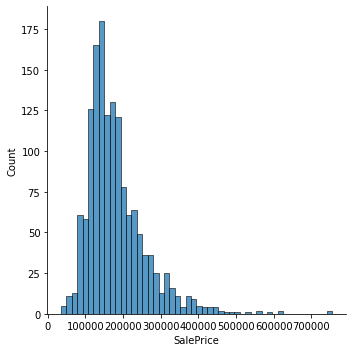

In [ ]:
import seaborn as sns
sns.displot(data=train_df['SalePrice'], bins = 50); #Skewness positiva, perché la distrubuzione pende verso i num positivi
#skewness = 0 , la distribuzione è gaussiana


Il picco della distribuzione è tra i 100.000 e i 200.000. Si nota bene che la distribuzione ha una coda pronunciata verso destra (skewness positiva), cioè verso i prezzi più alti. Inoltre sembra avere un picco piuttosto pronunciato rispetto a una distribuzione normale (kurtosis positiva). 

In particolare:

In [ ]:
# descrizione statistica del DataFrame
train_df['SalePrice'].describe()

#il 25% delle case è a 129975 etc


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
print('Skewness:', train_df['SalePrice'].skew())
print('Kurtosis:', train_df['SalePrice'].kurt())

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


N.B. i valori specifici di skewness e kurtosis possono servire ma non sono sempre indispensabili, qui stiamo cercando più che altro di farci un'idea di come sono distribuiti i prezzi delle case

### 2.2 VARIABILE TARGET vs ALTRE VARIABILI SCELTE

Possiamo ora analizzare le relazioni della variabile target con altre variabili. Per cominciare possiamo usare quelle che abbiamo individuato come molto importanti 'a occhio' sul foglio excel. 
Prendiamo per esempio: 
- OverallQual
- OverallCond
- YearBuilt
- TotalBsmtSF
- GrLivArea
- YearRemodAdd

In [ ]:
train_df.info()


Di queste variabili solo TotalBsmtSF e GrLivArea sono variabili numeriche. Le altre sono variabili categoriche (ebbene sì, anche gli anni sono da considerare come variabili categoriche!). Quindi vanno analizzate con strumenti diversi.

#### 2.2.1 Relazioni con variabili numeriche

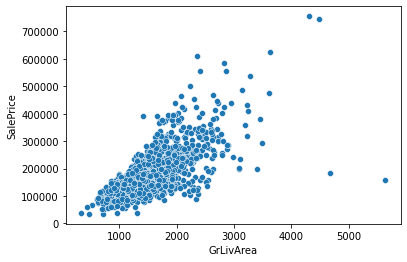

In [ ]:
### SalePrice VS GrLivArea, per vedere come varia saleprice in funzione di living area
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df);
#Si può vedere la relazione positiva, al variare di una varia l'altra. Relazione diretta perché parte quasi da 0

La relazione del prezzo di vendita con il valore dell'area del piano sopra-terra è evidente. Il tipo di relazione sembra essere lineare, o debolmente esponenziale.

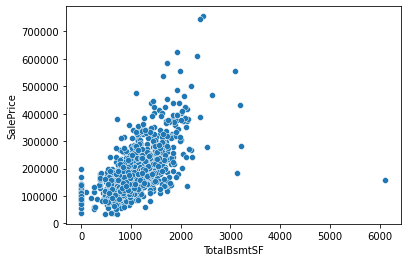

In [ ]:
### SalePrice VS TotalBsmtSF
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_df);

Anche l'area del piano interrato è evidentemente correlata con SalePrice. Però quella casa con un (mostruso) piano interrto di più di 6000 square feet mi schiaccia tutto il grafico a sinistra, quindi per vederla meglio mi conviene toglierlo usando .set_xlim():

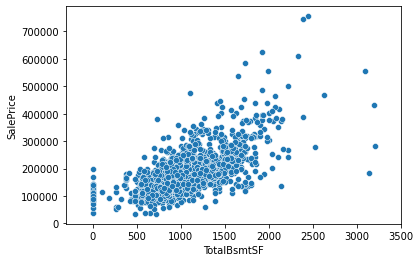

In [ ]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_df).set_xlim(right=3500); #metto un limite 
#la linea a sinistra vuol dire che ci sono case che magari non hanno un prezzo

N.B. Se vogliamo vedere come appare una relazione poco significativa prendiamo per esempio BsmtUnfSF (area del piano interrato non rifinito). Al variare dell'area non corrisponde un aumento ben visibile dei prezzi di vendita:

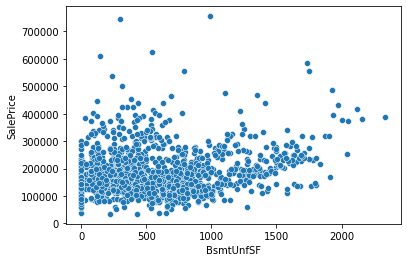

In [ ]:
### SalePrice VS TotalBsmtSF 
plot = sns.scatterplot(x='BsmtUnfSF', y='SalePrice', data=train_df);

#### 2.2.2 Relazioni con variabili categoriche

Per esaminare la relazione di SalePrice con variabili categoriche non possiamo stabilire una semplice relazione numerica come abbiamo fatto finora. C'è bisogno di plottare la distribuzione dei prezzi per ogni possibile categoria, e poi metterle in paragone tra loro.

Prendiamo per esempio la variabile 'Neighborhood' (quartiere). Mi aspetto che a Northridge Heights (NridgHt), che è un quartiere particolamente facoltoso, la distribuzione dei prezzi sarà centrata su valori piuttosto alti:

In [ ]:
#seleziono solo i dati in cui il quartiere è uguale a NridgHt
train_df[train_df['Neighborhood']=='NridgHt']

In [ ]:
#se facessi solo questo, mi ritornerebbe una serie booleana
train_df['Neighborhood']=='NridgHt' 

In [ ]:
#posso anche scrivere così per selezionare i dati in cui il quartiere è NridgHt
cond = train_df['Neighborhood']=='NridgHt' 
train_df[cond]

In [ ]:
#posso anche scrivere così per selezionare i dati in cui il quartiere è NridgHt ed il suo rispettivo prezzo
cond = train_df['Neighborhood']=='NridgHt' 
train_df[cond]['SalePrice'] 

11      345000
20      325300
25      256300
27      306000
34      277500
         ...  
1289    281000
1305    325000
1306    202500
1359    315000
1437    394617
Name: SalePrice, Length: 77, dtype: int64

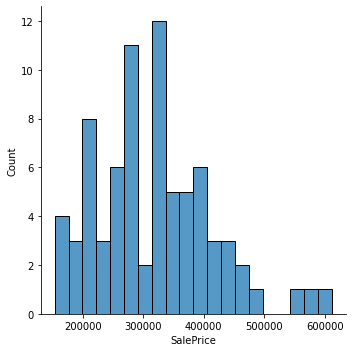

In [ ]:
data = train_df[train_df['Neighborhood']=='NridgHt']['SalePrice'] 
sns.displot(data, bins=20);

Mentre a 'College Creek' probabilmente il prezzo oscillerà attorno a valori più bassi:

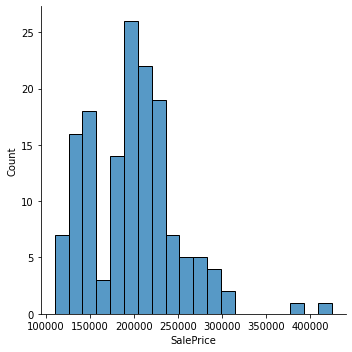

In [ ]:
data = train_df[train_df['Neighborhood']=='CollgCr']['SalePrice']
sns.displot(data, bins=20);

Seaborn mette a disposizione la funzione 'boxplot', che oermette di plottare direttamente le distribuzioni di ogni categoria in un singolo plot. Per la variabile 'Neighborhood':

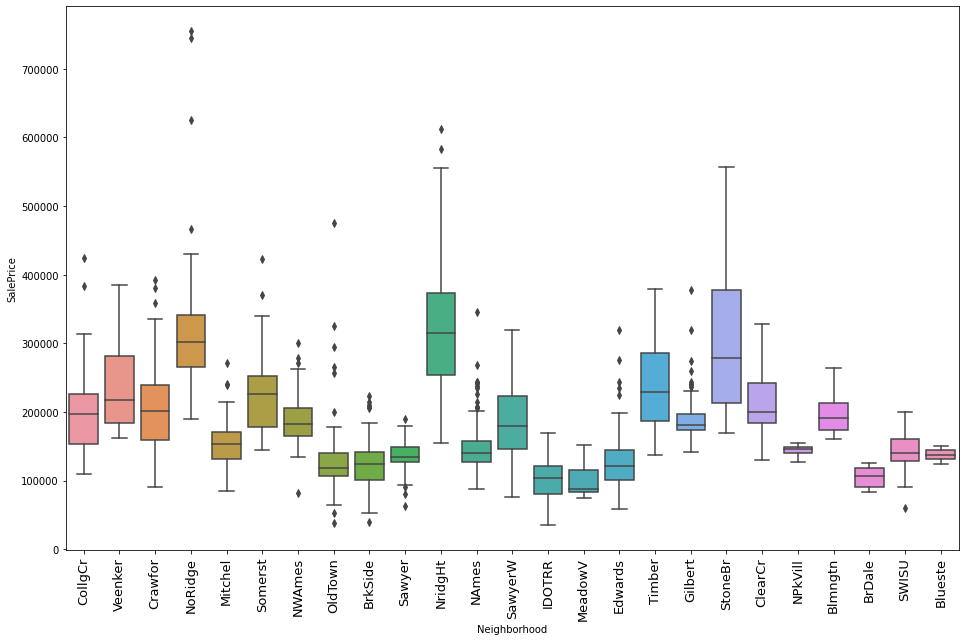

In [ ]:
### Neighborhood VS SalePrice

plt.figure(figsize=(16,10)) #matplotlib gestisce anche seaborn, quindi la grandezza della figura la gestisco tramite matplotlib
sns.boxplot(x='Neighborhood', y="SalePrice", data=train_df)
plt.xticks(rotation=90, fontsize=13); # ruota le etichette sull'asse x

Neighborhood sembra in effetti essere una variabile di una certa importanza nel determinare il prezzo di vendita, anche se ovviamente non può essere presa da sola per fare una previsione.

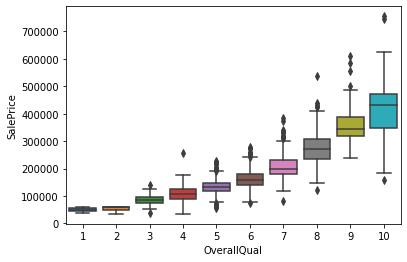

In [ ]:
### OverallQual VS SalePrice

sns.boxplot(x='OverallQual', y="SalePrice", data=train_df);

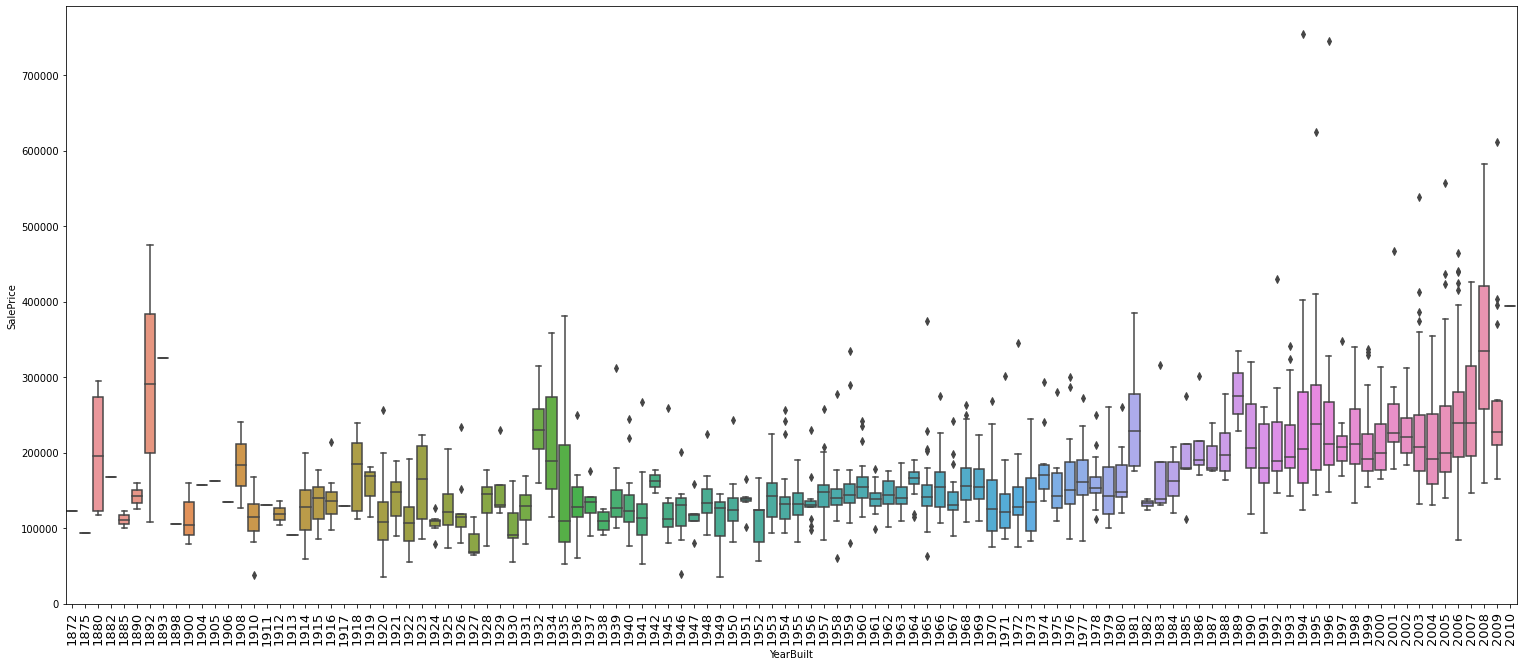

In [ ]:
### YearBuilt VS SalePrice

plt.figure(figsize=(26,11))
sns.boxplot(x='YearBuilt', y="SalePrice", data=train_df)
plt.xticks(rotation=90, fontsize=13);

Possiamo dire che sembra esserci una correlazione tra l'anno in cui è stata costruita la casa e il prezzo di vendita, con un andamento crescente generalmente costante negli anni.

# 3. CORRELAZIONI INTERO DATASET

Finora abbia costruito un'analisi soggettiva, che è molto utile per iniziare a prendere dimestichezza con i dati, però abbiamo tenuto fuori molte altre variabili che potrebbero risultare più importanti di quanto possano sembrare a prima vista.

Occorre un'analisi più oggettiva e strutturata sulll'intero dataset. Gli strumenti che useremo qui sono:
- una matrice delle correlazioni fra tutte le variabili (visualizzata con sns.heatmap())
- uno zoom sulle le 10 variabili più correlate con SalePrice (visualizzata prima con sns.heatmap(), poi con sns.pairplot()

In [ ]:
# Matrice di correlazione
train_df.corr()

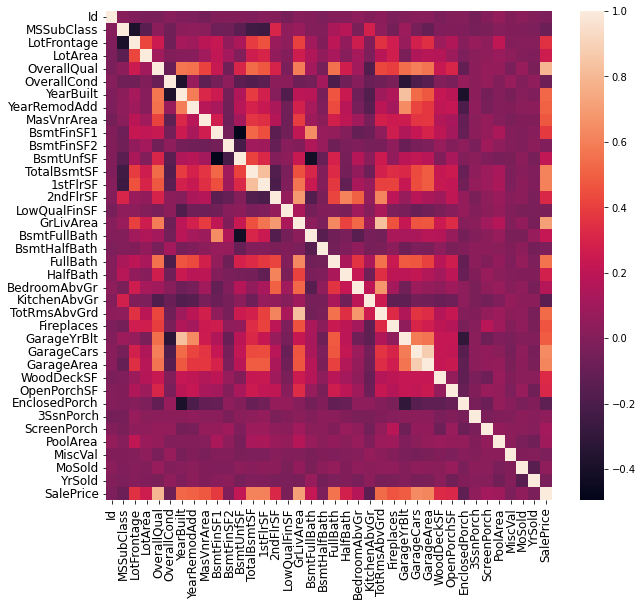

In [ ]:
# visualizzata con sns.heatmap
corr_matrix = train_df.corr()

plt.figure(figsize=(10,9))
sns.heatmap(corr_matrix)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#le features(colonne) che hanno un andamento troppo simile tra di  loro rovinano l'agoritmo

In [ ]:
corr_matrix['SalePrice'].sort_values(ascending=False) #voglio vedere la correlazione tra Sales Price e le altre features(colonne) e le ordino dal più grande a piccolo

Ora vediamo le correlazioni con SalePrice

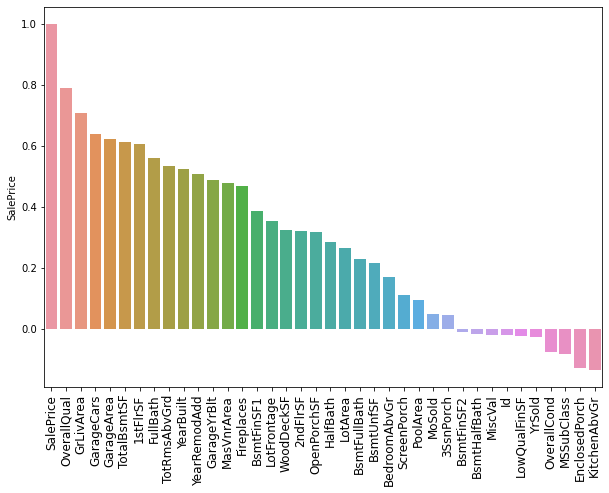

In [ ]:
sale_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=sale_corr.index, y=sale_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

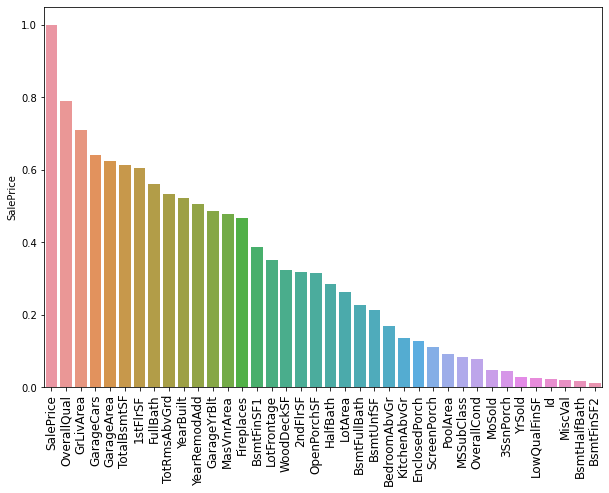

In [ ]:
sale_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
#uso abs per mettere i valori assoluti
plt.figure(figsize=(10,7))
sns.barplot(x=sale_corr.index, y=sale_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [ ]:
sale_corr

In [ ]:
sale_corr.loc['SalePrice']

1.0

In [ ]:
sale_corr.iloc[0] #integer location

1.0

In [92]:
sale_corr.iloc[1:11] #prendo le prime 10, diversamente da python iloc prende fino a quel numero

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [ ]:
sale_corr.iloc[1:11].index #index ti dice i nomi

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

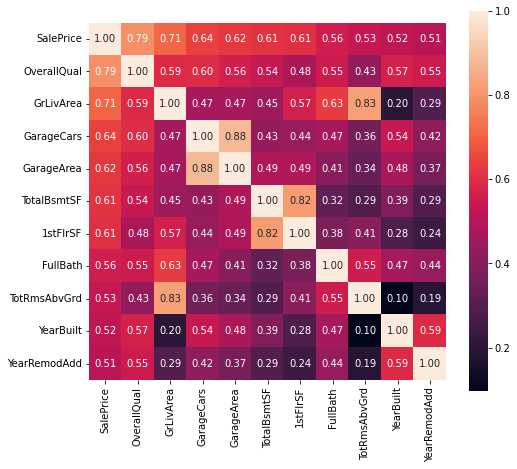

In [ ]:
# Seleziono le prime variabili più correlate con Saleprice per darci un occhio da più vicino 
# NB. ovviamente non mi interessa che siano correlate positivamente o negativamente, ma in valore assoluto, per questo uso .abs())
most_corr_vars = sale_corr.abs().iloc[0:11].index
most_corr_matrix = train_df[most_corr_vars].corr()

plt.figure(figsize=(8,7))
hm = sns.heatmap(most_corr_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

Volendo Seaborn mette a disposizione la funzione pairplot() per visualizzare gli scatterplot incrociati e le distribuzioni delle variabili...

In [ ]:
sns.pairplot(data=train_df[most_corr_vars]);